### Hi
Doing analysis for friend  
Inference on one variable with ~12 regressors  

Dependent is some index for traffic?
Independent is ?

In [1]:
import sys

In [16]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


from sklearn.preprocessing import scale

from statsmodels.api import formula as smf
import statsmodels.api as sm

%matplotlib inline

## Data prep

In [3]:
os.chdir('/Users/yidongli/Desktop/poop/')

In [4]:
os.listdir(os.getcwd())

['Sheet3-Table 1.csv', 'Sheet1-Table 1.csv', 'Sheet2-Table 1.csv']

In [5]:
df_raw = pd.read_csv('Sheet1-Table 1.csv')
df_raw.head()

,month.year,traffic_index,km_of_roads,public_rides,parking,trips,cars,motos,traffic_violations
0,dt2,y,x1,x2,x3,x4,x5,x6,x7
1,时间\n(年，月),交通拥堵\n延迟指数（即高峰拥堵时期所花费的时间与畅通时期所花费的时间的比值，当该项指数降为...,中心城区道路供给（公里）,公交当月供给量（人次）,公共停车供给\n（泊位）,机动车当月出行总量\n（车次）,汽车当月保有量\n（辆）,摩托车当月保有量\n（辆）,当月交通违法行为\n（宗）
2,17.6,1.45,117.22,731889,13707,21653388,330200,239705,19547
3,17.7,1.44,117.22,694746,13707,19721135,333128,244882,20523
4,17.8,1.44,117.22,686974,13707,23393827,336532,249288,22442


In [85]:
df = df_raw.loc[2:, :].copy()

df['dt'] = pd.to_datetime(
    (df['month.year']
         .str
         .slice(0, 2)
         .apply(lambda x: f"20{x}")
         .add(
             (df['month.year']
                  .str
                  .slice(3)
                  .apply(lambda x: f"-{x}"))
         )
    )
)
df = (df
          .set_index('dt')
          .drop('month.year', axis=1)
          .apply(pd.to_numeric)
          .assign(


          )
     )

df = df.assign(
    ind=range(df.shape[0]),
    vehicles=(df.cars + df.motos),
    trips_per_vehicle=(df.trips.div(df.cars + df.motos)),
    parking_per_vehicle=(df.parking.div(df.cars + df.motos)),
    km_per_vehicle=(df.km_of_roads.div(df.cars + df.motos)),
    km_per_parking=(df.km_of_roads.div(df.parking)),
    log_trips=df.trips.apply(np.log),
    log_traffic_index=df.traffic_index.apply(np.log)
)

df_scaled = df.apply(lambda x: scale(x.values)).assign(ind=df.ind)
df.head()

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/utils/validat

,traffic_index,km_of_roads,public_rides,parking,trips,cars,motos,traffic_violations,ind,vehicles,trips_per_vehicle,parking_per_vehicle,km_per_vehicle,km_per_parking,log_trips,log_traffic_index
dt,,,,,,,,,,,,,,,,
2017-06-01,1.45,117.22,731889,13707,21653388,330200,239705,19547,0,569905,37.994732,0.024051,0.000206,0.008552,16.890672,0.371564
2017-07-01,1.44,117.22,694746,13707,19721135,333128,244882,20523,1,578010,34.119020,0.023714,0.000203,0.008552,16.797201,0.364643
2017-08-01,1.44,117.22,686974,13707,23393827,336532,249288,22442,2,585820,39.933473,0.023398,0.000200,0.008552,16.967983,0.364643
2017-09-01,1.45,117.22,672518,13707,27538720,340374,253244,25903,3,593618,46.391316,0.023091,0.000197,0.008552,17.131104,0.371564
2017-10-01,1.45,117.22,751743,13707,28432719,343684,256506,22775,4,600190,47.372864,0.022838,0.000195,0.008552,17.163051,0.371564


# Explo viz

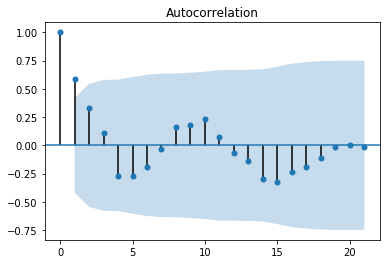

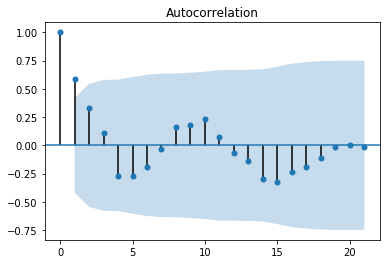

In [8]:
sm.graphics.tsa.plot_acf(df.trips_per_vehicle)

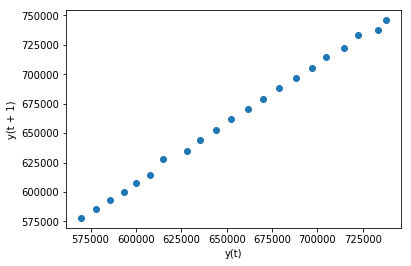

In [78]:
pd.plotting.autocorrelation_plot(df.vehicles)

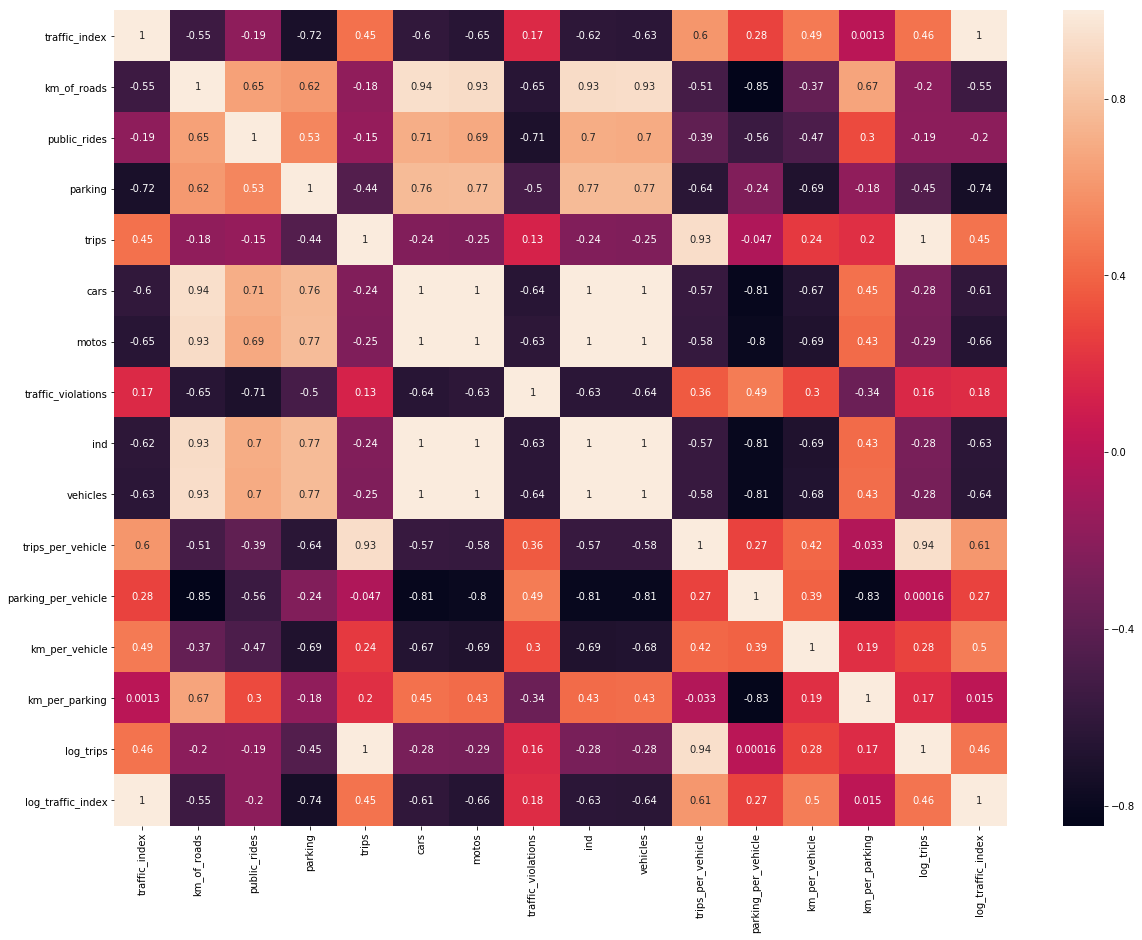

In [90]:
fig = plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, )

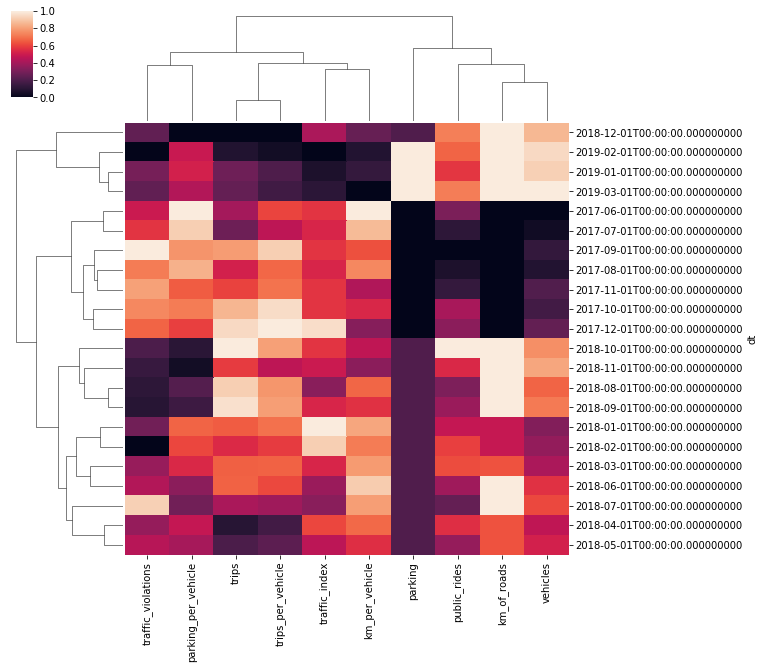

In [10]:
sns.clustermap(df.drop(['ind', 'cars', 'motos'], axis=1), standard_scale=1)
# vehicles + km_of_roads * parking + trips_per_vehicle

In [26]:
smf.ols('traffic_index ~ trips_per_vehicle', data=df_scaled).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          traffic_index   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     11.21
Date:                Fri, 05 Apr 2019   Prob (F-statistic):            0.00320
Time:                        23:10:25   Log-Likelihood:                -26.322
No. Observations:                  22   AIC:                             56.64
Df Residuals:                      20   BIC:                             58.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.554e-15      0.179   8.68e-15      1.000      -0.373       0.373
trips_per_vehicle     0.5993      0.179      3.348      0.003       0.226       0.973
==============================================================================
Omnibus:                        1.801   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.406   Jarque-Bera (JB):                1.530
Skew:                           0.592   Prob(JB):                        0.465
Kurtosis:                       2.484   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/envs/tensorflow/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


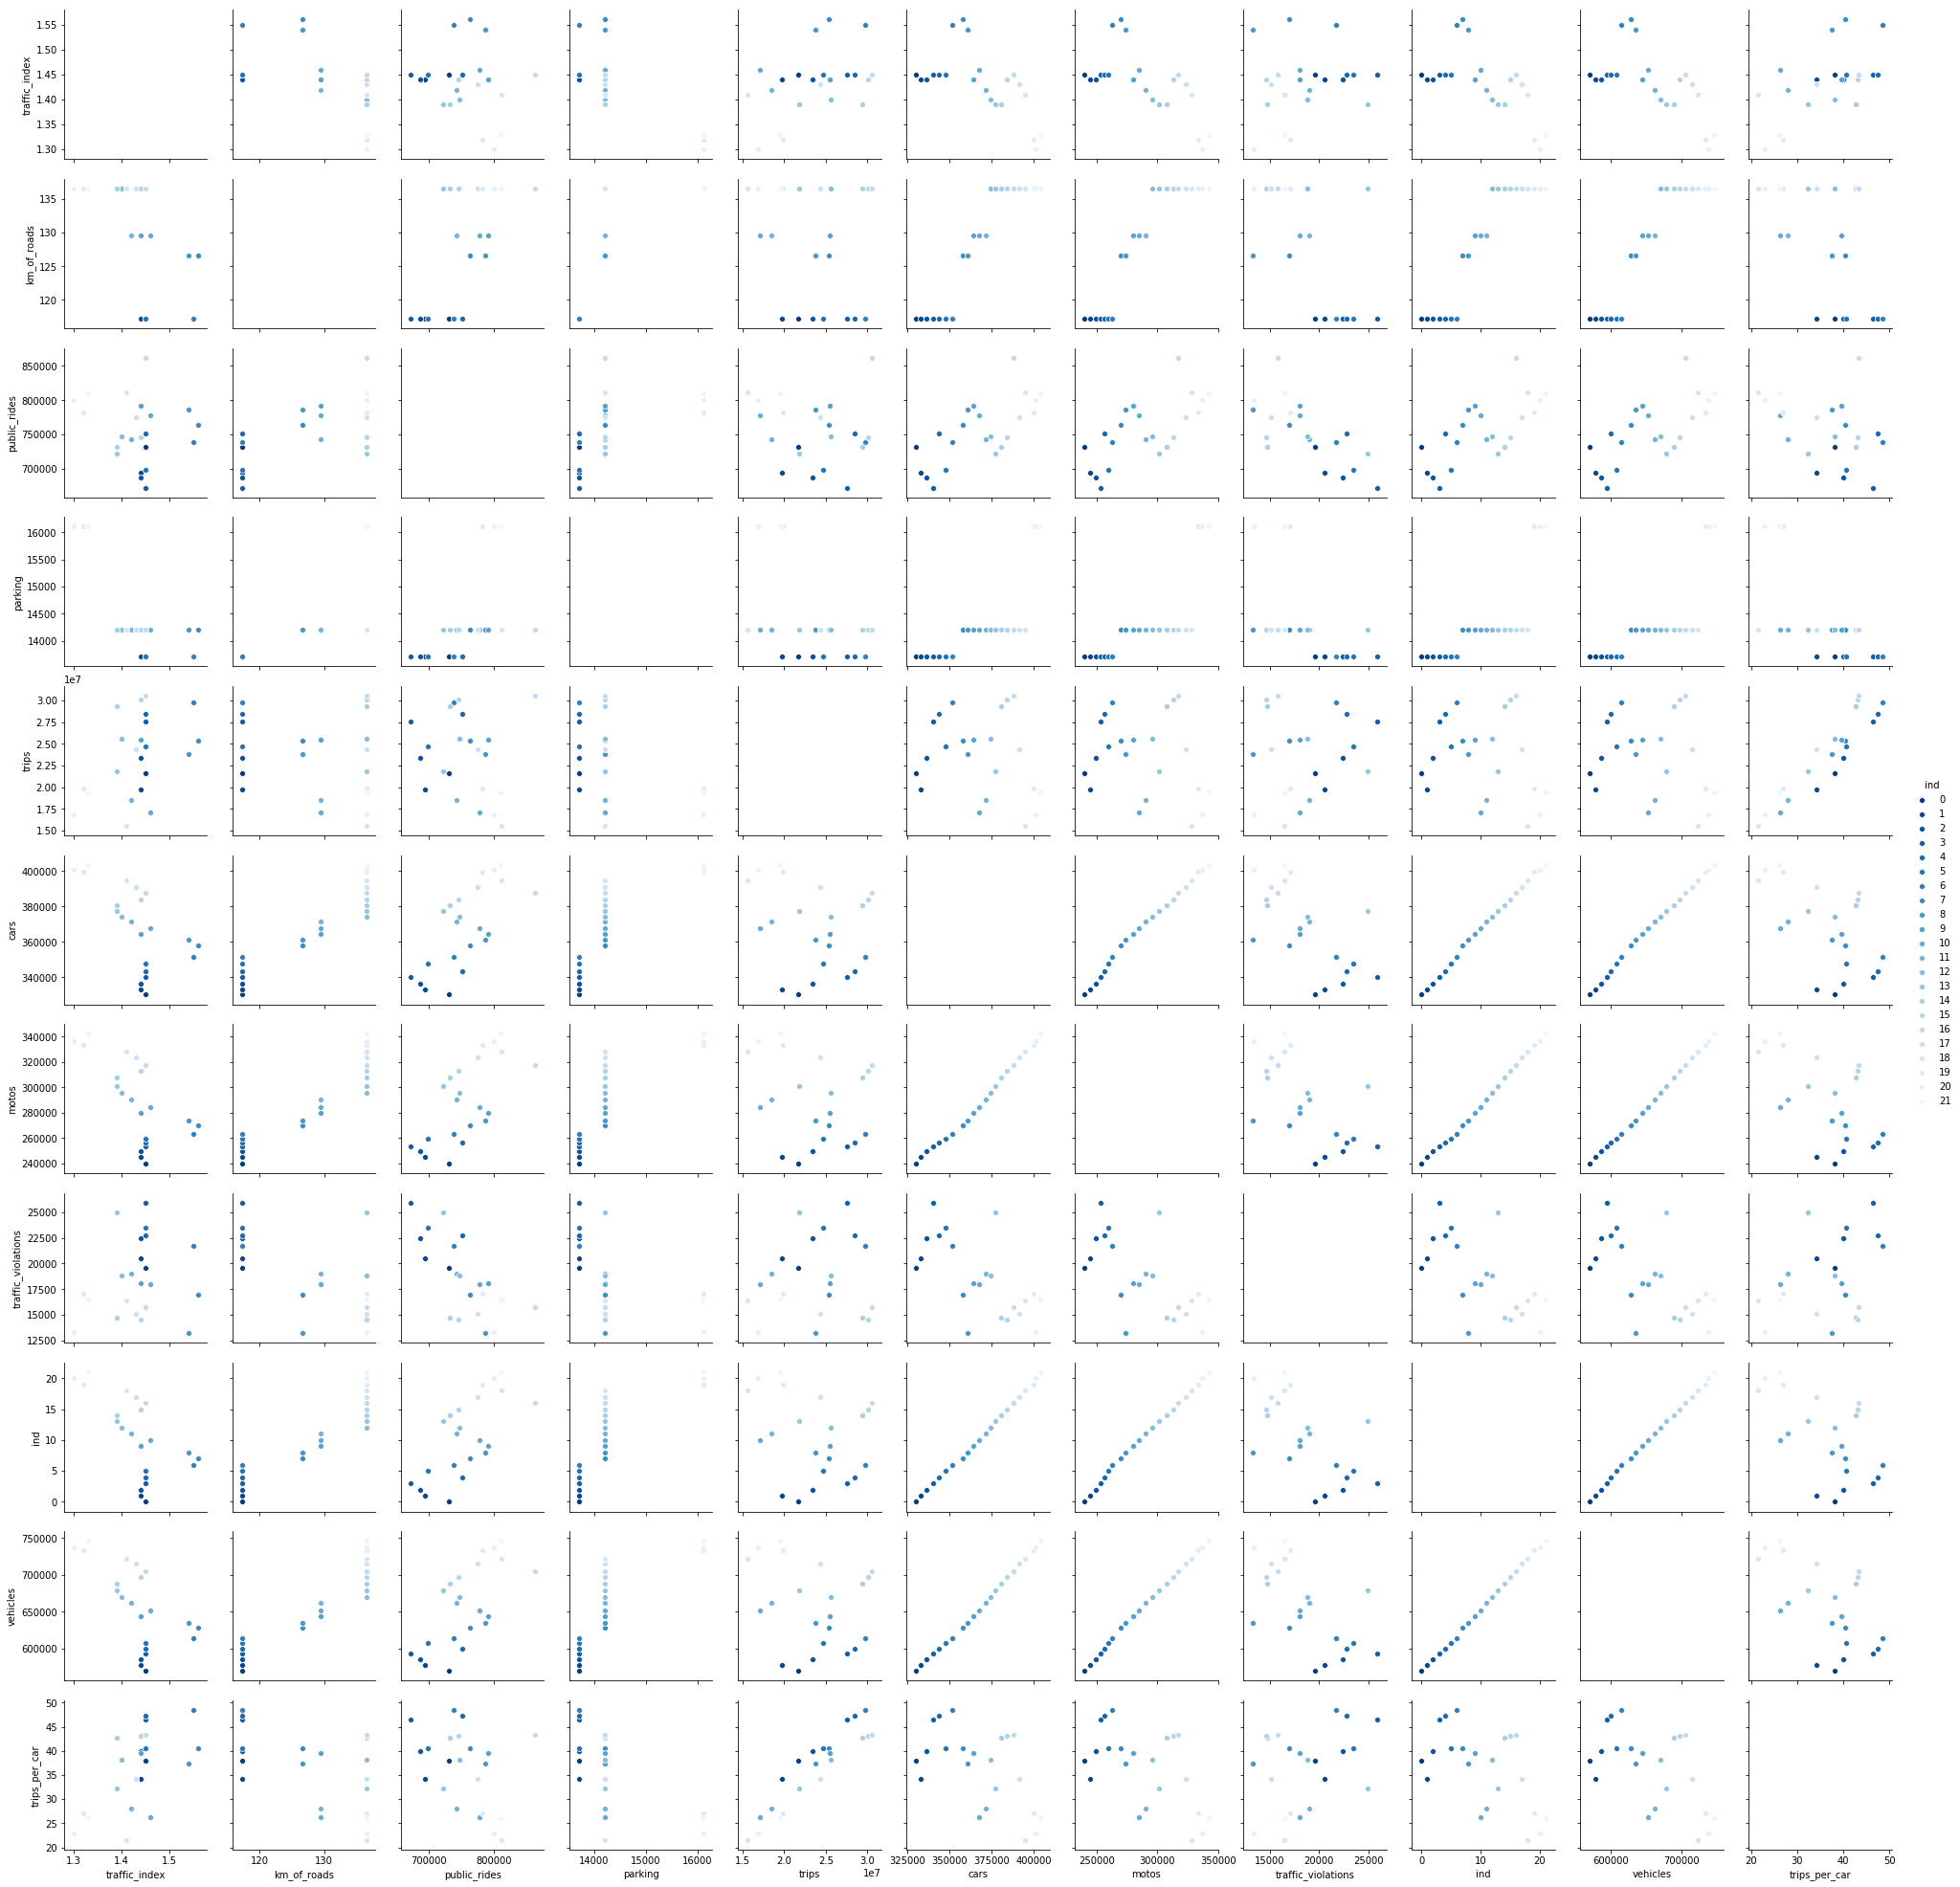

In [90]:
sns.pairplot(df, hue='ind', palette='Blues_r')

<IPython.core.display.Javascript object>


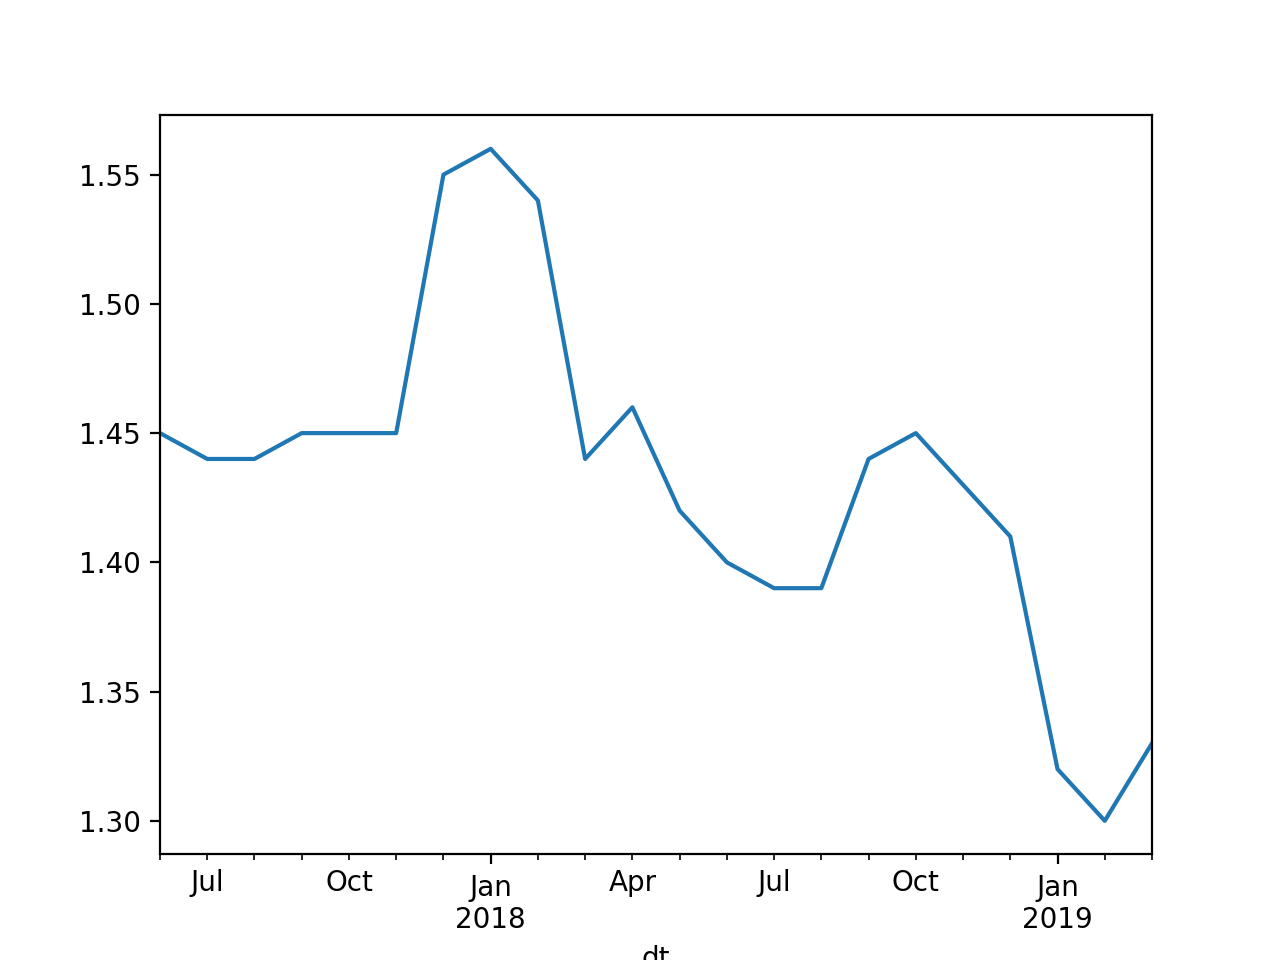

In [47]:
df.traffic_index.plot()

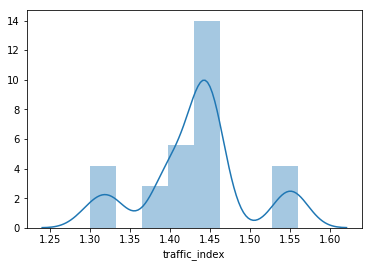

In [95]:
sns.distplot(df.traffic_index)

###  Modelling

In [117]:
df.columns

Index(['traffic_index', 'km_of_roads', 'public_rides', 'parking', 'trips',
       'cars', 'motos', 'traffic_violations', 'ind', 'vehicles',
       'trips_per_vehicle', 'parking_per_vehicle', 'km_per_vehicle'],
      dtype='object')

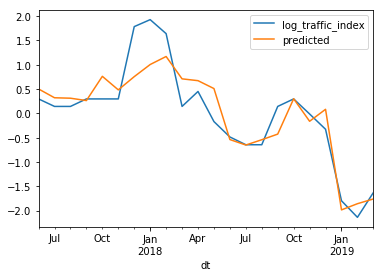

AxesSubplot(0.125,0.125;0.775x0.755)


In [102]:
# m = smf.ols('traffic_index ~ vehicles + vehicles:km_of_roads + vehicles:parking_per_vehicle', data=df_scaled).fit()
# m = smf.ols('log_traffic_index ~ vehicles + km_of_roads * parking + trips_per_vehicle', data=df_scaled).fit()
# m = smf.ols('log_traffic_index ~ vehicles + km_per_vehicle + parking_per_vehicle + trips_per_vehicle', data=df_scaled).fit()
m = smf.ols('log_traffic_index ~ vehicles + km_of_roads * parking * km_per_parking + public_rides', data=df_scaled).fit_regularized()


_df = pd.concat([
    df_scaled.log_traffic_index, 
    m.predict(df_scaled).rename('predicted')
], axis=1).plot()
plt.show()
print(_df)
m.summary()

### findings:
1. better mgt in parking:
    * km_of_roads up, index down
    * parking up, index up
    * if control km_of_roads, paking up, index down
    * if control parking, km_of_roads up, index down
2. public rides not helping:
    * public_rides up, index up
    * trips_per_vehicle up, index up
    * if control public_rides, trips_per_vehicle up, index up
    * if control trips_per_vehicle, public_rides up, index up

In [122]:
smf.ols('traffic_index ~ km_of_roads * parking + public_rides + trips_per_vehicle', data=df_scaled).fit().summary()
        

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          traffic_index   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     16.79
Date:                Sat, 06 Apr 2019   Prob (F-statistic):           7.24e-06
Time:                        11:13:49   Log-Likelihood:                -11.063
No. Observations:                  22   AIC:                             34.13
Df Residuals:                      16   BIC:                             40.67
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.9777      0.259      3.777      0.002       0.429       1.526
km_of_roads            -1.5222      0.321     -4.748      0.000      -2.202      -0.843
parking                 1.0363      0.428      2.419      0.028       0.128       1.945
km_of_roads:parking    -1.5873      0.388     -4.096      0.001      -2.409      -0.766
public_rides            0.2618      0.142      1.842      0.084      -0.040       0.563
trips_per_vehicle       0.3047      0.135      2.261      0.038       0.019       0.590
==============================================================================
Omnibus:                        1.454   Durbin-Watson:                   1.736
Prob(Omnibus):                  0.483   Jarque-Bera (JB):                0.340
Skew:                           0.138   Prob(JB):                        0.843
Kurtosis:                       3.543   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
smf.ols('traffic_index ~ vehicles + km_of_roads * parking', data=df_scaled).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          traffic_index   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     15.23
Date:                Fri, 05 Apr 2019   Prob (F-statistic):           1.83e-05
Time:                        23:19:08   Log-Likelihood:                -14.469
No. Observations:                  22   AIC:                             38.94
Df Residuals:                      17   BIC:                             44.39
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.2006      0.297      4.044      0.001       0.574       1.827
vehicles                0.7449      0.459      1.622      0.123      -0.224       1.714
km_of_roads            -2.2863      0.600     -3.809      0.001      -3.553      -1.020
parking                 1.0535      0.427      2.467      0.025       0.152       1.954
km_of_roads:parking    -1.9492      0.446     -4.375      0.000      -2.889      -1.009
==============================================================================
Omnibus:                        1.647   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                0.547
Skew:                           0.324   Prob(JB):                        0.761
Kurtosis:                       3.419   Cond. No.                         12.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

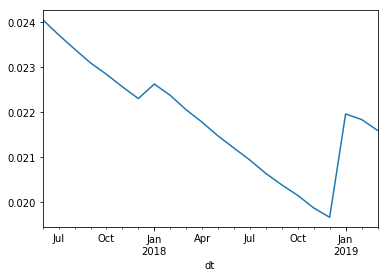

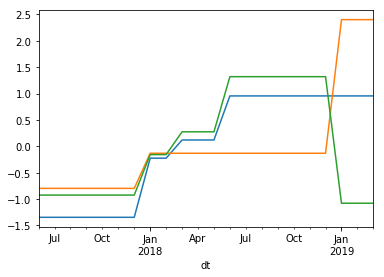

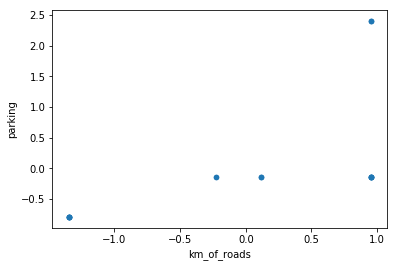

In [91]:
df_scaled.km_of_roads.plot()
df_scaled.parking.plot()
df_scaled.km_per_parking.plot()
plt.show()
df_scaled.plot(x='km_of_roads', y='parking', kind='scatter')

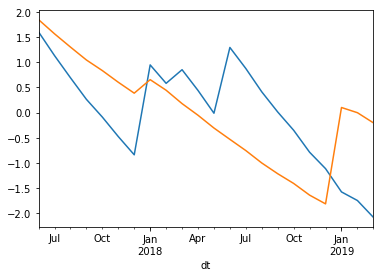

In [58]:
# df_scaled.km_of_roads.plot()
df_scaled.km_per_vehicle.plot()
df_scaled.parking_per_vehicle.plot()

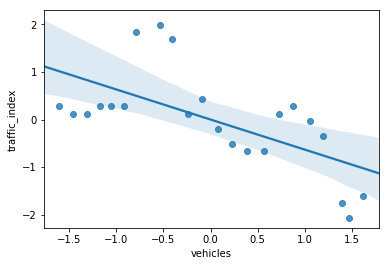

In [169]:
sns.regplot(data=df_scaled, y='traffic_index', x='vehicles')